Maximum Heat Capacity: 9.79e-23 J/K
Dissociation Temperature (Maximum C_V): 30.00 K


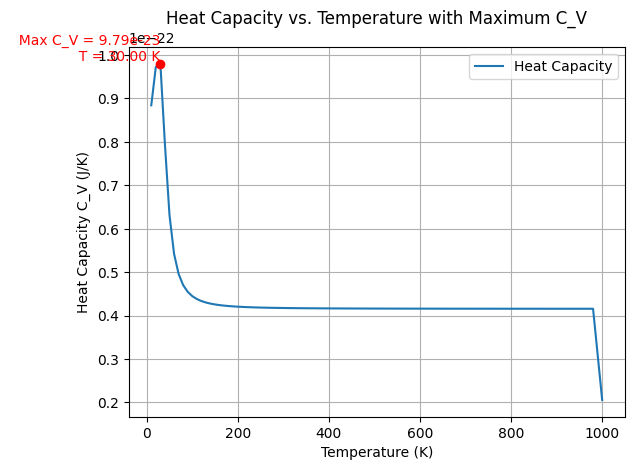

In [124]:
import numpy as np
from scipy.constants import k, h
from scipy.integrate import trapezoid
import matplotlib.pyplot as plt
from math import sqrt
import csv
import os

# Given Parameters
epsilon = 0.0103 * 1.60218e-19  # Lennard-Jones energy parameter in Joules (convert eV to Joule)
sigma = 3.4e-10  # Lennard-Jones length scale in meters (converted from Å)
V = 1000 * 1e-30  # Volume of the cubic box in cubic meters (converted from Å^3)
T_min = 10  # Minimum temperature in Kelvin
T_max = 1000  # Maximum temperature in Kelvin
N_points = 100  # Number of temperature points
m = 39.948 * 1.66053904e-27  # Mass of Argon in kg 
h = 6.62607015e-34  # Planck's constant in J·s

# Temperature range
T_values = np.linspace(T_min, T_max, N_points)

# Maximum relative distance in the cubic box (diagonal of the cubic box)
L_max = np.cbrt(V)

# Thermal wavelength λ
def thermal_wavelength(T):
    return sqrt(h ** 2 / (2 * np.pi * m * k * T)) 

# Lennard-Jones potential between two particles at relative distance r
def lj_potential(r):
    return 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6)

# # Partition function for two LJ particles in a cubic box
# def partition_function(T):
#     λ = thermal_wavelength(T)  # Use thermal wavelength formula with Planck's constant
#     pre_factor = (V ** 2) / (λ ** 6)  # Pre-factor accounting for both particles

#     # Set the minimum and maximum relative distances based on the fixed volume
#     r_min = 0.001 * sigma  # Avoid zero to prevent singularity
#     r_max = np.cbrt(V)

#     # Discretize the range of relative distances between two particles
#     r_values = np.linspace(r_min, r_max, 1000)

#     # Compute the integrand for the partition function over the relative distance r
#     integrand = np.exp(-lj_potential(r_values) / (k * T)) * r_values**2

#     # Perform the trapezoidal integration over the relative distance r
#     Z_total = trapezoid(integrand, r_values)

#     return pre_factor * Z_total  # Return the partition function result

def partition_function(T):
    λ = thermal_wavelength(T)  # Use thermal wavelength formula with Planck's constant
    pre_factor = (4 * np.pi) ** 2 / (λ ** 6)  # Pre-factor accounting for spherical integration for both particles

    # Set the minimum and maximum relative distances based on the fixed volume
    r_min = 0.001 * sigma  # Avoid zero to prevent singularity
    r_max = np.cbrt(V)

    # Discretize the range of relative distances between two particles
    r_values = np.linspace(r_min, r_max, 1000)

    # Compute the integrand for the partition function over the relative distance r
    integrand = np.exp(-lj_potential(r_values) / (k * T)) * r_values**2

    # Perform the trapezoidal integration over the relative distance r for one particle
    Z_spherical = trapezoid(integrand, r_values)

    # Square the result to account for spherical integration over both particles
    Z_total = Z_spherical ** 2

    return pre_factor * Z_total  # Return the partition function result

# # Function to calculate internal energy
# def internal_energy(T):
#     beta = 1 / (k * T)
#     Z = partition_function(T)  # Assumed that this function doesn't save to a CSV
#     delta_T = T * 0.01  # Small finite difference step for numerical differentiation
#     Z_plus = partition_function(T + delta_T)
#     Z_minus = partition_function(T - delta_T)
#     delta_beta = (1 / (k * (T + delta_T))) - (1 / (k * (T - delta_T)))
#     dlnZ_dBeta = (np.log(Z_plus) - np.log(Z_minus)) / delta_beta
#     U = -(dlnZ_dBeta)
#     return U

# # Heat capacity C_V from internal energy U
# def heat_capacity(T_values):
#     U_values = np.array([internal_energy(T) for T in T_values])
#     C_V_values = np.gradient(U_values, T_values)  # Derivative of U with respect to T
#     return C_V_values, U_values

# # Write data to CSV file
# def write_csv(T_values, U_values, C_V_values):
#     current_directory = os.getcwd()
#     folder_name = "comp-prob-solv/homework-4-grad"
#     directory = os.path.join(current_directory, folder_name)
#     os.makedirs(directory, exist_ok=True)
#     csv_file_path = os.path.join(directory, "internal_energy_heat_capacity_vs_temperature.csv")

#     # Write the results to a CSV file
#     with open(csv_file_path, mode='w', newline='') as file:
#         writer = csv.writer(file)
#         writer.writerow(['Temperature (K)', 'Internal Energy (J)', 'Heat Capacity (J/K)'])
#         for T, U, C_V in zip(T_values, U_values, C_V_values):
#             writer.writerow([T, U, C_V])

#     print(f"CSV file successfully created at {csv_file_path}")

# # Find dissociation temperature
# def find_dissociation_temperature(C_V_values):
#     max_index = np.argmax(C_V_values)
#     dissociation_temp = T_values[max_index]
#     max_CV = C_V_values[max_index] 
#     print(f"Maximum Heat Capacity: {max_CV:.2e} J/K")
#     print(f"Dissociation Temperature (Maximum C_V): {dissociation_temp:.2f} K")
#     return dissociation_temp, max_CV

# # Plot heat capacity with dissociation temperature
# def plot_heat_capacity_with_dissociation(C_V_values, dissociation_temp, max_CV):
#     plt.plot(T_values, C_V_values, label='Heat Capacity')
#     plt.scatter([dissociation_temp], [max_CV], color='red', zorder=5)
#     plt.text(dissociation_temp, max_CV, f'  Max C_V = {max_CV:.2e}\n  T = {dissociation_temp:.2f} K', 
#              verticalalignment='bottom', horizontalalignment='right', color='red')
#     plt.title('Heat Capacity vs. Temperature with Maximum C_V')
#     plt.xlabel('Temperature (K)')
#     plt.ylabel('Heat Capacity C_V (J/K)')
#     plt.grid(True)
#     plt.legend()
#     plt.show()

# # Main execution
# C_V_values, U_values = heat_capacity(T_values)  # Calculate C_V and internal energy
# dissociation_temp, max_CV = find_dissociation_temperature(C_V_values)  # Find and print dissociation temperature
# plot_heat_capacity_with_dissociation(C_V_values, dissociation_temp, max_CV)  # Plot heat capacity with annotation

# Internal energy calculation using np.gradient
def internal_energy(T_values):
    Z_values = np.array([partition_function(T) for T in T_values])
    lnZ_values = np.log(Z_values)
    beta_values = 1 / (k * T_values)
    dlnZ_dBeta = np.gradient(lnZ_values, beta_values)
    U_values = -dlnZ_dBeta  # Internal energy U = -d(lnZ)/d(beta)
    return U_values

# Heat capacity calculation using np.gradient
def heat_capacity(T_values):
    U_values = internal_energy(T_values)
    C_V_values = np.gradient(U_values, T_values)
    return C_V_values, U_values

# Plotting the heat capacity with dissociation temperature
def plot_heat_capacity_with_dissociation(C_V_values, dissociation_temp, max_CV):
    plt.plot(T_values, C_V_values, label='Heat Capacity')
    plt.scatter([dissociation_temp], [max_CV], color='red', zorder=5)
    plt.text(dissociation_temp, max_CV, f'  Max C_V = {max_CV:.2e}\n  T = {dissociation_temp:.2f} K', 
             verticalalignment='bottom', horizontalalignment='right', color='red')
    plt.title('Heat Capacity vs. Temperature with Maximum C_V')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Heat Capacity C_V (J/K)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Find dissociation temperature from C_V values
def find_dissociation_temperature(C_V_values):
    max_index = np.argmax(C_V_values)
    dissociation_temp = T_values[max_index]
    max_CV = C_V_values[max_index]
    print(f"Maximum Heat Capacity: {max_CV:.2e} J/K")
    print(f"Dissociation Temperature (Maximum C_V): {dissociation_temp:.2f} K")
    return dissociation_temp, max_CV

# Main execution
C_V_values, U_values = heat_capacity(T_values)
dissociation_temp, max_CV = find_dissociation_temperature(C_V_values)
plot_heat_capacity_with_dissociation(C_V_values, dissociation_temp, max_CV)


In [5]:
# # Compute partition function for all temperatures
# partition_values = [partition_function(T) for T in T_values]

# # Get the current working directory
# current_directory = os.getcwd()

# # Specify the folder where the file will be saved, relative to the current directory
# folder_name = "comp-prob-solv/homework-4-grad"
# directory = os.path.join(current_directory, folder_name)

# # Create the directory if it does not exist
# os.makedirs(directory, exist_ok=True)

# # Specify the CSV file path
# csv_file_path = os.path.join(directory, "partition_function_vs_temperature.csv")

# # Write the results to a CSV file
# with open(csv_file_path, mode='w', newline='') as file:
#     writer = csv.writer(file)
#     # Write header
#     writer.writerow(['Temperature (K)', 'Partition Function'])
    
#     # Write data rows
#     for T, Z in zip(T_values, partition_values):
#         writer.writerow([T, Z])

# print(f"CSV file successfully created at {csv_file_path}")

In [127]:
import numpy as np
from scipy.constants import k, h
from scipy.integrate import trapezoid
import matplotlib.pyplot as plt
from math import sqrt
import csv
import os

# Given Parameters
epsilon = 0.0103 * 1.60218e-19  # Lennard-Jones energy parameter in Joules (convert eV to Joule)
sigma = 3.4e-10  # Lennard-Jones length scale in meters (converted from Å)
V = 1000 * 1e-30  # Volume of the cubic box in cubic meters (converted from Å^3)
T_min = 10  # Minimum temperature in Kelvin
T_max = 1000  # Maximum temperature in Kelvin
N_points = 100  # Number of temperature points
m = 39.948 * 1.66053904e-27  # Mass of Argon in kg 
h = 6.62607015e-34  # Planck's constant in J·s

# Temperature range
T_values = np.linspace(T_min, T_max, N_points)

# Define the integration grid for cubic coordinates
grid_points = 100  # Number of points for each dimension (x, y, z)
box_length = 10e-10  # The box length in meters (converted from Å)
x_values = np.linspace(0, box_length, grid_points)  # Convert Å to meters
y_values = np.linspace(0, box_length, grid_points)
z_values = np.linspace(0, box_length, grid_points)

# Lennard-Jones potential between two particles at relative distance r
def lj_potential(r):
    return 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6)

# Partition function
def partition_function(T):
    λ = sqrt(h ** 2 / (2 * np.pi * m * k * T))  # Thermal wavelength
    pre_factor = 1 / λ**6  # Pre-factor involving thermal wavelength
    
    # Create 3D mesh grids for the coordinates of both particles
    X1, Y1, Z1 = np.meshgrid(x_values, y_values, z_values, indexing='ij')
    X2, Y2, Z2 = np.meshgrid(x_values, y_values, z_values, indexing='ij')

    # Calculate distance between particles
    r = np.sqrt((X2 - X1)**2 + (Y2 - Y1)**2 + (Z2 - Z1)**2)

    # Avoid division by zero (skip r = 0)
    r[r < 1e-10] = np.inf

    # Boltzmann factor for each relative distance
    boltzmann_factors = np.exp(-lj_potential(r) / (k * T))

    # Numerical integration over all spatial dimensions using trapezoidal rule
    Z = trapezoid(boltzmann_factors, x_values, axis=0)
    Z = trapezoid(Z, y_values, axis=0)
    Z = trapezoid(Z, z_values, axis=0)

    # Ensure Z still has dimensions left for further integration
    Z = trapezoid(Z, x_values, axis=0) if Z.ndim > 1 else Z
    Z = trapezoid(Z, y_values, axis=0) if Z.ndim > 1 else Z
    Z = trapezoid(Z, z_values) if Z.ndim > 0 else Z

    # Multiply partition function by the pre-factor
    Z *= pre_factor
    return Z

Maximum Heat Capacity: 4.14e-23 J/K
Dissociation Temperature (Maximum C_V): 980.00 K


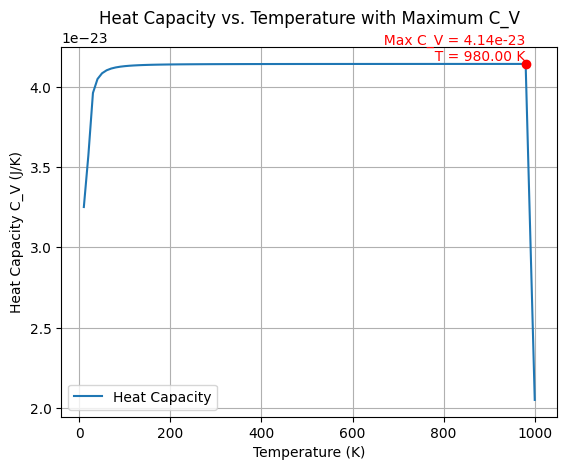

In [128]:
# # Function to calculate internal energy
# def internal_energy(T):
#     Z = partition_function(T)
#     delta_T = 1  # Small step for finite difference approximation
#     Z_plus = partition_function(T + delta_T)
#     Z_minus = partition_function(T - delta_T)
#     delta_beta = (1 / (k * (T + delta_T))) - (1 / (k * (T - delta_T)))
#     dlnZ_dBeta = (np.log(Z_plus) - np.log(Z_minus)) / delta_beta
#     U = -dlnZ_dBeta
#     return U

# Internal energy calculation using np.gradient
def internal_energy(T_values):
    Z_values = np.array([partition_function(T) for T in T_values])
    lnZ_values = np.log(Z_values)
    beta_values = 1 / (k * T_values)
    dlnZ_dBeta = np.gradient(lnZ_values, beta_values)
    U_values = -dlnZ_dBeta  # Internal energy U = -d(lnZ)/d(beta)
    return U_values

# Heat capacity calculation using np.gradient
def heat_capacity(T_values):
    U_values = internal_energy(T_values)
    C_V_values = np.gradient(U_values, T_values)
    return C_V_values, U_values

# Plotting the heat capacity with dissociation temperature
def plot_heat_capacity_with_dissociation(C_V_values, dissociation_temp, max_CV):
    plt.plot(T_values, C_V_values, label='Heat Capacity')
    plt.scatter([dissociation_temp], [max_CV], color='red', zorder=5)
    plt.text(dissociation_temp, max_CV, f'  Max C_V = {max_CV:.2e}\n  T = {dissociation_temp:.2f} K', 
             verticalalignment='bottom', horizontalalignment='right', color='red')
    plt.title('Heat Capacity vs. Temperature with Maximum C_V')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Heat Capacity C_V (J/K)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Find dissociation temperature from C_V values
def find_dissociation_temperature(C_V_values):
    max_index = np.argmax(C_V_values)
    dissociation_temp = T_values[max_index]
    max_CV = C_V_values[max_index]
    print(f"Maximum Heat Capacity: {max_CV:.2e} J/K")
    print(f"Dissociation Temperature (Maximum C_V): {dissociation_temp:.2f} K")
    return dissociation_temp, max_CV

# Main execution
C_V_values, U_values = heat_capacity(T_values)
dissociation_temp, max_CV = find_dissociation_temperature(C_V_values)
plot_heat_capacity_with_dissociation(C_V_values, dissociation_temp, max_CV)


# # Define the temperature range
# T_values = np.linspace(10, 1000, 100)  # From 10 K to 1000 K, with 100 points

# # Calculate internal energy for each temperature in the range
# U_values = [internal_energy(T) for T in T_values]

# # Print the internal energy values
# for T, U in zip(T_values, U_values):
#     print(f"Temperature: {T:.2f} K, Internal Energy: {U:.5e} J")

In [120]:
# # Heat capacity C_V from internal energy U
# def heat_capacity(T_values):
#     U_values = np.array([internal_energy(T) for T in T_values])
#     C_V_values = np.gradient(U_values, T_values)  # Derivative of U with respect to T
#     return C_V_values, U_values

# # Main execution
# C_V_values, U_values = heat_capacity(T_values)  # Calculate C_V and internal energy

# Heat capacity C_V from internal energy U
def heat_capacity(T_values):
    """
    Calculates the heat capacity C_V(T) by taking the derivative of U(T).
    
    Parameters:
    T_values (array-like): Array of temperature values.

    Returns:
    C_V_values (array-like): Heat capacity values for each temperature.
    U_values (array-like): Internal energy values for each temperature.
    """
    # Calculate internal energy for all temperatures
    U_values = np.array([internal_energy(T) for T in T_values])

    # Calculate heat capacity by taking the gradient of internal energy with respect to T
    C_V_values = np.gradient(U_values, T_values)
    
    return C_V_values, U_values

# # Heat capacity C_V from internal energy U
# def heat_capacity(T_values):
#     if np.isscalar(T_values):  # If it's a single temperature
#         delta_T = 1e-5 * T_values  # Small temperature step for finite difference
#         U_plus = internal_energy(T_values + delta_T)
#         U_minus = internal_energy(T_values - delta_T)
#         C_V_single = (U_plus - U_minus) / (2 * delta_T)  # Finite difference approximation
#         return C_V_single, internal_energy(T_values)
    
#     else:  # If it's an array of temperatures
#         U_values = np.array([internal_energy(T) for T in T_values])
#         C_V_values = np.gradient(U_values, T_values)  # Derivative of U with respect to T
#         return C_V_values, U_values

# # Example for a single temperature
# T_single = 30  # Example temperature
# C_V_single, U_single = heat_capacity(T_single)

# print(f"Heat capacity at T = 10 K: {C_V_single}")
# print(f"Internal energy at T = 10 K: {U_single}")



IndexError: index 0 is out of bounds for axis 0 with size 0

In [112]:
# Plotting the heat capacity and adding the dissociation temperature
def plot_heat_capacity_with_dissociation(C_V_values, dissociation_temp, max_CV):
    plt.plot(T_values, C_V_values, label='Heat Capacity')
    
    # Mark the maximum heat capacity point (convert to lists to avoid errors in plt.scatter)
    plt.scatter([dissociation_temp], [max_CV], color='red', zorder=5)
    plt.text(dissociation_temp, max_CV, f'  Max C_V = {max_CV:.2e}\n  T = {dissociation_temp:.2f} K', 
             verticalalignment='bottom', horizontalalignment='right', color='red')
    
    plt.title('Heat Capacity vs. Temperature with Maximum C_V')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Heat Capacity C_V (J/K)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Calculate the dissociation temperature
def find_dissociation_temperature(C_V_values):
    max_index = np.argmax(C_V_values)
    dissociation_temp = T_values[max_index]
    max_CV = C_V_values[max_index] 
    
    # # 3-1-3 Checking point 2) This maximum corresponds to the atomization temperature of the LJ dimer

    # Print the maximum heat capacity and corresponding temperature only once
    print(f"Maximum Heat Capacity: {max_CV:.2e} J/K")
    print(f"Dissociation Temperature (Maximum C_V): {dissociation_temp:.2f} K")
    
    return dissociation_temp, max_CV

# Main execution
C_V_values, U_values = heat_capacity(T_values)  # Calculate C_V and internal energy
dissociation_temp, max_CV = find_dissociation_temperature(C_V_values)  # Find and print dissociation temperature

# Plot the heat capacity with the maximum heat capacity annotated
plot_heat_capacity_with_dissociation(C_V_values, dissociation_temp, max_CV)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [94]:
import numpy as np
from scipy.constants import k, h
from scipy.integrate import trapezoid
import matplotlib.pyplot as plt
from math import sqrt

# Given Parameters
epsilon = 0.0103 * 1.60218e-19  # Lennard-Jones energy parameter in Joules (convert eV to Joule)
sigma = 3.4e-10  # Lennard-Jones length scale in meters (converted from Å)
V = 1000 * 1e-30  # Volume of the cubic box in cubic meters (converted from Å^3)
T_min = 10  # Minimum temperature in Kelvin
T_max = 1000  # Maximum temperature in Kelvin
N_points = 100  # Number of temperature points
m = 39.948 * 1.66053904e-27  # Mass of Argon in kg 
h = 6.62607015e-34  # Planck's constant in J·s

# Temperature range
T_values = np.linspace(T_min, T_max, N_points)

# Define the integration grid for cubic coordinates
grid_points = 200  # Increase the number of points for higher resolution
box_length = 10e-10  # The box length in meters (converted from Å)
x_values = np.linspace(0, box_length, grid_points)
y_values = np.linspace(0, box_length, grid_points)
z_values = np.linspace(0, box_length, grid_points)

# Lennard-Jones potential between two particles at relative distance r
def lj_potential(r):
    return 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6)

# Partition function for two LJ particles in a cubic box
def partition_function(T):
    λ = sqrt(h ** 2 / (2 * np.pi * m * k * T))  # Use thermal wavelength formula with Planck's constant
    pre_factor = 1 / λ**6  
    
    # Create 3D mesh grids for the coordinates of both particles
    X1, Y1, Z1 = np.meshgrid(x_values, y_values, z_values, indexing='ij')
    X2, Y2, Z2 = np.meshgrid(x_values, y_values, z_values, indexing='ij')
    
    # Calculate the distance between the two particles for each combination of coordinates
    r = np.sqrt((X2 - X1)**2 + (Y2 - Y1)**2 + (Z2 - Z1)**2)
    
    # Avoid division by zero
    r[r == 0] = np.inf  # Set r=0 to infinity to prevent division by zero
    
    # Compute the Boltzmann factor for each relative distance
    boltzmann_factors = np.exp(-lj_potential(r) / (k * T))
    
    # Perform the numerical integration over all six spatial dimensions using trapezoidal rule
    Z = trapezoid(boltzmann_factors, x_values, axis=0)  # Integrate over x1
    Z = trapezoid(Z, y_values, axis=0)  # Integrate over y1
    Z = trapezoid(Z, z_values, axis=0)  # Integrate over z1

    if Z.ndim > 1:  # Ensure Z still has multiple dimensions left
        Z = trapezoid(Z, x_values, axis=0)  # Integrate over x2

    if Z.ndim > 1:  # Ensure Z still has multiple dimensions left
        Z = trapezoid(Z, y_values, axis=0)  # Integrate over y2
    
    if Z.ndim > 0:  # Ensure Z still has at least one dimension left
        Z = trapezoid(Z, z_values)  # Final integration over z2

    # Multiply the partition function by the pre-factor to account for volume and thermal wavelength
    Z *= pre_factor
    
    return Z

In [95]:
# Function to calculate internal energy
def internal_energy(T):
    Z = partition_function(T)
    delta_T = T * 0.1  # Small step for finite difference approximation
    Z_plus = partition_function(T + delta_T)
    Z_minus = partition_function(T - delta_T)
    delta_beta = (1 / (k * (T + delta_T))) - (1 / (k * (T - delta_T)))
    dlnZ_dBeta = (np.log(Z_plus) - np.log(Z_minus)) / delta_beta
    U = -dlnZ_dBeta
    return U

# Heat capacity C_V from internal energy U
def heat_capacity(T_values):
    U_values = np.array([internal_energy(T) for T in T_values])
    C_V_values = np.gradient(U_values, T_values)  # Derivative of U with respect to T
    return C_V_values, U_values

# Main execution
C_V_values, U_values = heat_capacity(T_values)  # Calculate C_V and internal energy

# Plotting the heat capacity and adding the dissociation temperature
def plot_heat_capacity_with_dissociation(C_V_values, dissociation_temp, max_CV):
    plt.plot(T_values, C_V_values, label='Heat Capacity')
    
    # Mark the maximum heat capacity point (convert to lists to avoid errors in plt.scatter)
    plt.scatter([dissociation_temp], [max_CV], color='red', zorder=5)
    plt.text(dissociation_temp, max_CV, f'  Max C_V = {max_CV:.2e}\n  T = {dissociation_temp:.2f} K', 
             verticalalignment='bottom', horizontalalignment='right', color='red')
    
    plt.title('Heat Capacity vs. Temperature with Maximum C_V')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Heat Capacity C_V (J/K)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Calculate the dissociation temperature
def find_dissociation_temperature(C_V_values):
    max_index = np.argmax(C_V_values)
    dissociation_temp = T_values[max_index]
    max_CV = C_V_values[max_index] 
    
    print(f"Maximum Heat Capacity: {max_CV:.2e} J/K")
    print(f"Dissociation Temperature (Maximum C_V): {dissociation_temp:.2f} K")
    
    return dissociation_temp, max_CV

# Main execution
C_V_values, U_values = heat_capacity(T_values)  # Calculate C_V and internal energy
dissociation_temp, max_CV = find_dissociation_temperature(C_V_values)  # Find and print dissociation temperature

# Plot the heat capacity with the maximum heat capacity annotated
plot_heat_capacity_with_dissociation(C_V_values, dissociation_temp, max_CV)

KeyboardInterrupt: 